![images](https://user-images.githubusercontent.com/42184553/55184987-7a4f1400-51a4-11e9-8476-750bd7160da2.png)

#   Data wrangling WeRateDogs
#### Project - Data Analyst Nanodegree
#### Udacity - June 27, 2019
#### Alaa Alaboud - Dhahran - KSA

## Introduction


#### Analyzing, and Visualizing Data
Analyze and visualize our wrangled data, At least:

- three (3) insights. 
- one (1) visualization.

## Analyzing, and Visualizing Data

First, we need to import all the packages needed in our analyzing.

In [1]:
# Import all packages we needed
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
import re

### 1. The cleaned twitter archive master file

Load Dataset of this file `twitter_archive_master.csv`

In [2]:
# Load Dataset of cleaned twitter archive "twitter_archive_master.csv"
Archive_analyz = pd.read_csv('twitter_archive_master.csv')

# explore dataset
Archive_analyz.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,favorite_count,retweet_count,date,time,predic_dog,config_lvl
0,892177421306343426,NaN,NaN,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,32152,6022,2017-08-01,00:17:27+00:00,chihuahua,0.323581
1,891815181378084864,NaN,NaN,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,24241,3986,2017-07-31,00:18:03+00:00,chihuahua,0.716012
2,891689557279858688,NaN,NaN,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,40723,8292,2017-07-30,15:58:51+00:00,labrador retriever,0.168086
3,891327558926688256,NaN,NaN,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,38956,8982,2017-07-29,16:00:24+00:00,basset,0.555712
4,891087950875897856,NaN,NaN,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,19567,2984,2017-07-29,00:08:17+00:00,chesapeake bay retriever,0.425595


In [3]:
Archive_analyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 16 columns):
tweet_id                 1679 non-null int64
in_reply_to_status_id    19 non-null float64
in_reply_to_user_id      19 non-null float64
text                     1679 non-null object
expanded_urls            1679 non-null object
rating_numerator         1678 non-null float64
rating_denominator       1679 non-null int64
name                     1254 non-null object
dog_stages               259 non-null object
jpg_url                  1679 non-null object
favorite_count           1679 non-null int64
retweet_count            1679 non-null int64
date                     1679 non-null object
time                     1679 non-null object
predic_dog               1679 non-null object
config_lvl               1679 non-null float64
dtypes: float64(4), int64(4), object(8)
memory usage: 210.0+ KB


In [4]:
Archive_analyz.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,favorite_count,retweet_count,config_lvl
count,1.679000e+03,1.900000e+01,1.900000e+01,1678.000000,1679.0,1679.000000,1679.000000,1679.000000
mean,7.390761e+17,6.955096e+17,4.196984e+09,10.835983,10.0,8864.104229,2631.102442,0.549150
std,6.791405e+16,4.570687e+16,0.000000e+00,1.774028,0.0,13019.918126,4786.343905,0.299157
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,10.0,75.000000,11.000000,0.000010
25%,6.773302e+17,6.716455e+17,4.196984e+09,10.000000,10.0,2018.500000,592.000000,0.302443
50%,7.131759e+17,6.754971e+17,4.196984e+09,11.000000,10.0,4126.000000,1313.000000,0.548896
75%,7.931355e+17,6.975419e+17,4.196984e+09,12.000000,10.0,10958.000000,2982.500000,0.821684
max,8.921774e+17,8.558181e+17,4.196984e+09,14.000000,10.0,161598.000000,81971.000000,0.999956


### 1.Insight

The count of **dogs stages** in the tweets, and relationship with the **favorite counts**.

In [5]:
# count of the dog stages
stages = Archive_analyz['dog_stages'].value_counts()
stages

pupper     176
doggo       53
puppo       22
floofer      8
Name: dog_stages, dtype: int64

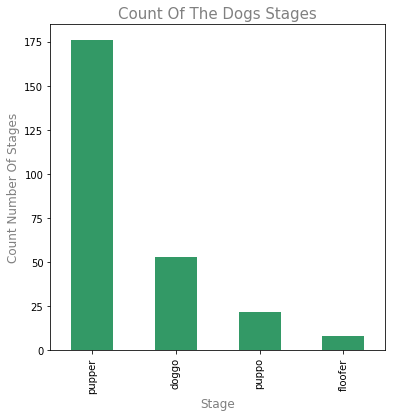

In [6]:
# plot bar chart for the count of the dogs stages
stages.plot(kind='bar', figsize=(6,6), color='#339966')

# Add a title of chart and for x, y labels
plt.title("Count Of The Dogs Stages", fontsize=15, color='grey')
plt.xlabel("Stage" ,fontsize=12, color='grey')
plt.ylabel("Count Number Of Stages" ,fontsize=12, color='grey');

# save
plt.savefig('Count_Dogs_Stages', dpi=70, bbox_inches='tight');

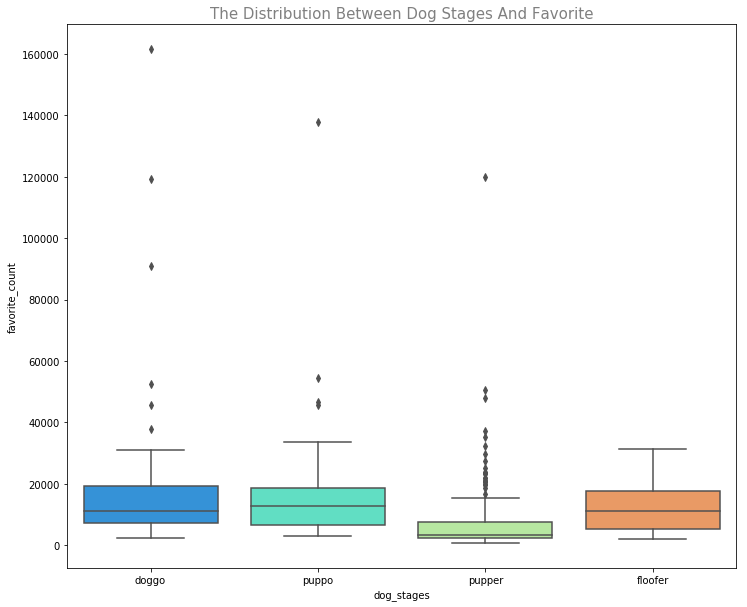

In [34]:
# plot Boxplot for dog stages and favorite count

plt.figure(figsize=(12,10))
stages_faver = sns.boxplot(x='dog_stages', y='favorite_count', data = Archive_analyz, palette='rainbow')
plt.title(label="The Distribution Between Dog Stages And Favorite" , fontsize=15, color='grey');

# save
plt.savefig('Dogs_Stages_With_Favorite', dpi=70, bbox_inches='tight');

### Conclusion

The **Pupper** stages are the most common rating in the **@dog_rates** account, about **176** tweets, that is mean many people prefer young dogs and interest on it, and then comes **Doggo** in the second with **53** tweets.
In third place, **Puppo** comes and it's mean the cute dog or puppy.
And the **Floofer** in the last place means there is a fewe of soft and fluffy dogs in the rating and in preferring people.

And as we saw in the **Boxplot** above,
the median of favorites by dog stages is in **Puppo** in the first place, then **floofer** comes in the second.
and the biggest favorites count is in **Puppo** then is in **Doggo**.
and the must outliers favorite is in the **Pupper** stage.

**So as we see, the cutest and the smallest dogs win! and got popular among the people.**

### 2.Insight

In tweets, The most dog **types**.

In [8]:
# count of the dog type
Archive_analyz['predic_dog'].value_counts()

golden retriever               157
labrador retriever             106
pembroke                        95
chihuahua                       91
pug                             62
toy poodle                      51
chow                            48
pomeranian                      42
samoyed                         41
malamute                        33
chesapeake bay retriever        31
cocker spaniel                  30
french bulldog                  30
miniature pinscher              25
eskimo dog                      22
german shepherd                 21
cardigan                        21
beagle                          20
staffordshire bullterrier       20
siberian husky                  20
shih tzu                        20
rottweiler                      19
maltese dog                     19
shetland sheepdog               19
lakeland terrier                18
kuvasz                          18
italian greyhound               17
basset                          17
west highland white 

In [9]:
# filter the types by the count 50 or more
dog_types = Archive_analyz.groupby('predic_dog').filter(lambda x: len(x) >= 50)

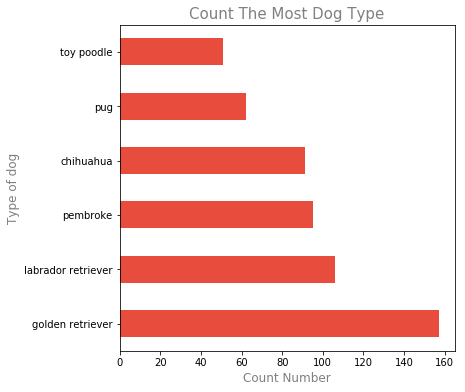

In [10]:
# plot chart bar horizontal for count most type of dogs.

dog_types['predic_dog'].value_counts().plot(kind = 'barh', figsize=(6,6), color='#E74C3C')

# Add a title of chart and for x, y labels
plt.title('Count The Most Dog Type', fontsize=15, color='grey')
plt.xlabel('Count Number', fontsize=12, color='grey')
plt.ylabel('Type of dog', fontsize=12, color='grey')

# save
plt.savefig('Dogs_types', dpi=70, bbox_inches='tight');

### Conclusion

After we analyzed in the database, the **Golden Retriever** is the most kind of dog, with **157** tweets.
And the **Labrador Retriever** come in the second place with **106** tweets.

And **Pembroke**, **Chihuahua** with tweets counts "**95, 91**", been in third and fourth place, and recorded in the higher popularity dogs.

**So I guess people prefer large dogs in height than the short dog's, but as we saw also the short dogs got high tweets.**

### 3.Insight

In tweets, The most dog **names**.

In [11]:
# count of the dog name
Archive_analyz['name'].value_counts()

a            46
Cooper       10
Tucker        9
Oliver        9
Lucy          9
Charlie       9
Penny         8
Sadie         7
Daisy         7
Winston       7
Lola          6
Jax           6
Koda          6
Toby          6
Stanley       5
Oscar         5
Leo           5
Rusty         5
Bella         5
Bo            5
Chester       4
George        4
Sophie        4
Cassie        4
an            4
Louis         4
Oakley        4
Dave          4
Duke          4
Gus           4
             ..
space         1
Nollie        1
Dido          1
Kobe          1
Bowie         1
Divine        1
Ralphie       1
Ken           1
Bones         1
Pipsy         1
Curtis        1
Goose         1
Clarq         1
Brudge        1
Hubertson     1
Maxaroni      1
Luna          1
Huck          1
Tycho         1
Barney        1
Tuco          1
Tino          1
Smiley        1
Chaz          1
Tobi          1
Todo          1
Siba          1
Autumn        1
Keet          1
Strudel       1
Name: name, Length: 848,

In [12]:
# filter the names by uppercase letter
names_list = []
dog_names = Archive_analyz['name'].str.findall('([A-Z][a-z]+)')
names_list = dog_names.tolist() 
filter_list = list(filter(None,names_list))
filter_list

[['Tilly'],
 ['Archie'],
 ['Darla'],
 ['Franklin'],
 nan,
 ['Jax'],
 nan,
 ['Zoey'],
 ['Cassie'],
 ['Koda'],
 ['Bruno'],
 nan,
 ['Ted'],
 ['Stuart'],
 ['Oliver'],
 ['Jim'],
 ['Zeke'],
 ['Ralphus'],
 ['Gerald'],
 ['Jeffrey'],
 ['Canela'],
 nan,
 nan,
 ['Maya'],
 ['Mingus'],
 ['Roscoe'],
 ['Waffles'],
 ['Jimbo'],
 ['Maisey'],
 nan,
 ['Earl'],
 ['Lola'],
 ['Kevin'],
 nan,
 ['Yogi'],
 ['Noah'],
 ['Bella'],
 ['Grizzwald'],
 nan,
 ['Rusty'],
 ['Gus'],
 ['Stanley'],
 ['Alfy'],
 ['Koko'],
 ['Rey'],
 ['Gary'],
 nan,
 ['Bella'],
 ['Jesse'],
 nan,
 ['Romeo'],
 ['Bailey'],
 ['Duddles'],
 ['Jack'],
 ['Beau'],
 ['Snoopy'],
 ['Shadow'],
 ['Emmy'],
 ['Aja'],
 ['Penny'],
 ['Dante'],
 ['Nelly'],
 ['Ginger'],
 ['Benedict'],
 ['Venti'],
 ['Goose'],
 ['Nugget'],
 nan,
 ['Cash'],
 ['Jed'],
 nan,
 ['Sebastian'],
 nan,
 ['Sierra'],
 nan,
 nan,
 ['Monkey'],
 nan,
 ['Kody'],
 ['Lassie'],
 ['Rover'],
 ['Napolean'],
 ['Boomer'],
 ['Cody'],
 ['Zoey'],
 ['Rumble'],
 ['Dewey'],
 ['Stanley'],
 ['Scout'],
 ['Gizmo'],


In [13]:
# create new df and new column to put the filter list of names as list
df_name = pd.DataFrame()
df_name['list_names'] = np.array(filter_list)
df_name

,list_names
0,[Tilly]
1,[Archie]
2,[Darla]
3,[Franklin]
4,NaN
5,[Jax]
6,NaN
7,[Zoey]
8,[Cassie]
9,[Koda]


In [14]:
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 1 columns):
list_names    1178 non-null object
dtypes: object(1)
memory usage: 12.6+ KB


In [15]:
# create a new column to transfer names as string
def try_join(l):
    try:
        return ','.join(map(str, l))
    except TypeError:
        return np.nan

df_name['names_uppr'] = [try_join(l) for l in df_name['list_names']]
df_name.head(5)

,list_names,names_uppr
0,[Tilly],Tilly
1,[Archie],Archie
2,[Darla],Darla
3,[Franklin],Franklin
4,NaN,NaN


In [16]:
# check the null values
df_name['names_uppr'].isnull().sum()

425

In [17]:
# count of the dog names
df_name['names_uppr'].value_counts()

Cooper      10
Lucy         9
Charlie      9
Tucker       9
Oliver       9
Penny        8
Daisy        7
Winston      7
Sadie        7
Lola         6
Toby         6
Jax          6
Koda         6
Bella        5
Leo          5
Oscar        5
Rusty        5
Bo           5
Stanley      5
Dexter       4
Maggie       4
Jack         4
Chester      4
Sophie       4
George       4
Scooter      4
Dave         4
Cassie       4
Duke         4
Bear         4
            ..
Kaiya        1
Flash        1
Obi          1
Poppy        1
Sandy        1
Baron        1
Darby        1
Shikha       1
Cuddles      1
Nigel        1
Tiger        1
Terrance     1
Dutch        1
Orion        1
Traviss      1
Ed           1
Jareld       1
Stella       1
Pepper       1
Mason        1
Betty        1
Ruffles      1
Crumpet      1
Zeus         1
Dale         1
Donny        1
Chevy        1
Socks        1
Jessiga      1
Nollie       1
Name: names_uppr, Length: 827, dtype: int64

In [18]:
# filter the names by the count of 8 or more
names_filter = df_name.groupby('names_uppr').filter(lambda x: len(x) >= 8)

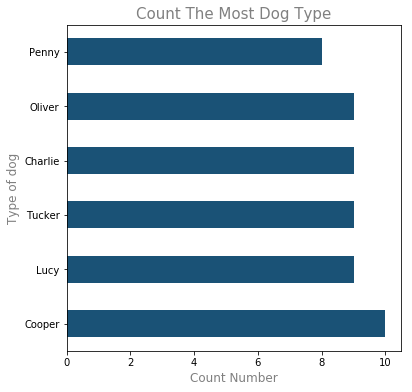

In [19]:
# plot chart bar horizontal for count most type of dogs.

names_filter['names_uppr'].value_counts().plot(kind = 'barh', figsize=(6,6), color='#1A5276')

# Add a title of chart and for x, y labels
plt.title('Count The Most Dog Type', fontsize=15, color='grey')
plt.xlabel('Count Number', fontsize=12, color='grey')
plt.ylabel('Type of dog', fontsize=12, color='grey')

# save
plt.savefig('dog_names', dpi=70, bbox_inches='tight');

### Conclusion

We found many popular names dog among the tweets like **Cooper** and got the first place, and **Lucy**, **Charlie**, **Tucker**, **Oliver**, **Penny**.

**I think people like specific names to be named for their dogs.**

### 4.Insight

The count of the created time by **hours** for tweets over the years.

In [20]:
# change format from object(string) to datetime
Archive_analyz['time']= pd.to_datetime(Archive_analyz['time']) 

In [21]:
Archive_analyz.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,favorite_count,retweet_count,date,time,predic_dog,config_lvl
0,892177421306343426,NaN,NaN,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,32152,6022,2017-08-01,2019-06-27 00:17:27+00:00,chihuahua,0.323581


In [22]:
# count the hour in time of created tweet
tweet_time = Archive_analyz['time'].dt.hour.value_counts() 
tweet_time

1     235
0     224
2     171
16    169
17    142
3     139
23     96
18     81
15     77
4      75
19     68
20     62
21     59
22     55
5      18
14      4
6       3
13      1
Name: time, dtype: int64

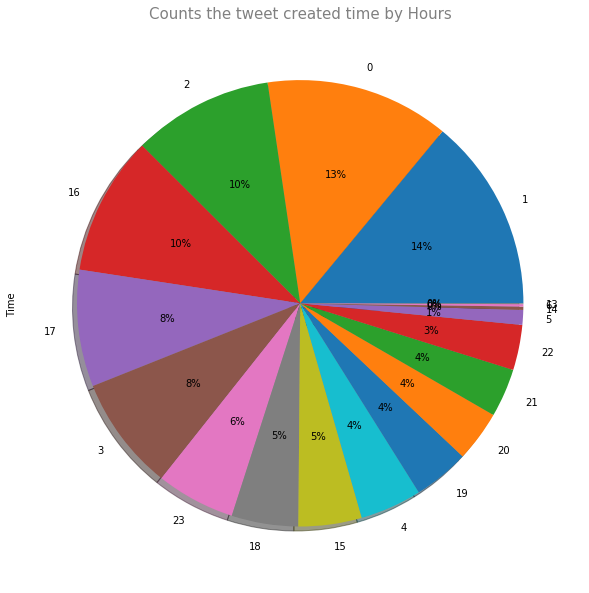

In [23]:
# Plot the pie visualization for the created tweet time

tweet_time.plot(kind='pie', label='Time' ,figsize=(10, 16), autopct='%1.0f%%', shadow=True)

plt.title(label="Counts the tweet created time by Hours" , fontsize=15, color='grey')

# save
plt.savefig('Tweet_time.png', dpi=70, bbox_inches='tight');

### Conclusion

We can see the **@dog_rates** accounts tweets at **1 AM ** the most of the times, and also in **12** and **2** and **3 Am**, 
then he also got high score tweets at 4 pm and 5 pm. 

**So as we see the account @dog_rates tweets in free time for most people and not in work times**.

### 5.Insight

The relationship between **dates** and **retweets** and **favorites** over the years.

In [24]:
# change format from object(string) to datetime
Archive_analyz['date']= pd.to_datetime(Archive_analyz['date']) 

In [25]:
# count the year in date of created tweet
tweet_year = Archive_analyz['date'].dt.year.value_counts() 
tweet_year

2016    848
2015    514
2017    317
Name: date, dtype: int64

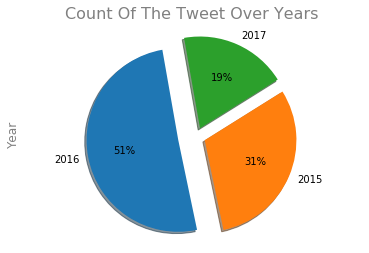

In [26]:
# plot pie tweet in the year of date created
count_year = list(Archive_analyz[Archive_analyz['date'] != 'None']['date'].dt.year.value_counts())[0:3]
tweet_years = Archive_analyz[Archive_analyz['date'] != 'None']['date'].dt.year.value_counts().index.tolist()[0:3]

explode = (0.2, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(count_year, explode = explode, labels = tweet_years, autopct='%1.0f%%', shadow = True, startangle = 100)
ax1.axis('equal')
plt.title('Count Of The Tweet Over Years', fontsize=16, loc='center', color='grey')
plt.ylabel('Year', fontsize=12, color='grey');

# save
plt.savefig('The_Tweet_Over_Years', dpi=70, bbox_inches='tight');

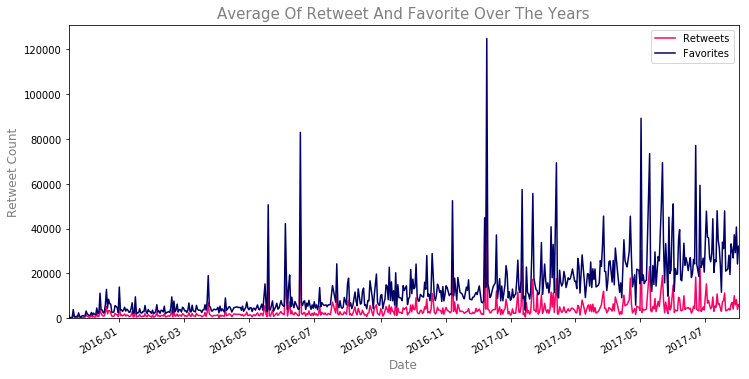

In [27]:
# plot chart line for retweets and favorites on tweets over the year

plt.subplots(1, sharex=True)
Archive_analyz.groupby('date')['retweet_count'].mean().plot(kind='line', figsize = (12, 6), color = '#ff0066')
Archive_analyz.groupby('date')['favorite_count'].mean().plot(kind='line', figsize = (12, 6), color = '#000066').set_ylim(0, )

# Add a title of chart and for x, y labels
plt.title('Average Of Retweet And Favorite Over The Years', fontsize=15, color='grey')
plt.xlabel('Date', fontsize=12, color='grey')
plt.ylabel('Retweet Count', fontsize=12, color='grey');
plt.legend(('Retweets', 'Favorites'))

# save
plt.savefig('Retweet_Favorite_In_Years', dpi=70, bbox_inches='tight');

### Conclusion

We saw the **@dog_rates** account was active in **2016** more than in **2015** with **51%** of all tweets in the database, and then decrease the number of tweets in **2017**, but we notice that the **retweet** and **favorite** have increased year after year.


**So the @dog_rates account got more popularity over the years.**